#    # This is a Python Project on an Amazon e-commerce Customer Reviews Data Set with Fashion Products

# DATA GATHERING AND CLEANSING

In [ ]:
# Connect to dataset

In [1]:
import os
os.chdir(r"C:\Users\alina\Documents\dsa python prject\Ali\Data")
os.getcwd()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from datetime import datetime
from sklearn import preprocessing
import seaborn as sns
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


In [4]:
#pip install pandas-profiling

In [2]:
import pandas_profiling

In [3]:
#Read files:
train = pd.read_csv("amazoncoecommercesam-fashion-products-on-amazon-com-QueryResult.csv")
test = pd.read_csv("amazon_co-ecommerce_sample.csv")

In [4]:
train['source']='train'
train.head()
test['source']='test'
data=pd.concat([train,test],ignore_index=True,sort=True)
print(train.shape, test.shape, data.shape)

(5000, 18) (10000, 18) (15000, 18)


In [5]:
data.head(10)

,amazon_category_and_sub_category,average_review_rating,customer_questions_and_answers,customer_reviews,customers_who_bought_this_item_also_bought,description,items_customers_buy_after_viewing_this_item,manufacturer,number_available_in_stock,number_of_answered_questions,number_of_reviews,price,product_description,product_information,product_name,sellers,source,uniq_id
0,Hobbies > Model Trains & Railway Sets > Rail V...,4.9 out of 5 stars,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Hornby,5 new,1.0,15,£3.42,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Hornby 2014 Catalogue,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",train,eac7efa5dbd3d667f26eb3d3ab504464
1,Hobbies > Model Trains & Railway Sets > Rail V...,4.5 out of 5 stars,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,FunkyBuys,NaN,1.0,2,£16.99,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,FunkyBuys® Large Christmas Holiday Express Fes...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",train,b17540ef7e86e461d37f3ae58b7b72ac
2,Hobbies > Model Trains & Railway Sets > Rail V...,3.9 out of 5 stars,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,ccf,2 new,2.0,17,£9.99,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",train,348f344247b0c1a935b1223072ef9d8a
3,Hobbies > Model Trains & Railway Sets > Rail V...,4.3 out of 5 stars,Can this train go backwards as well as forward...,Beautiful set // 5.0 // 3 Dec. 2015 // By\n ...,http://www.amazon.co.uk/Hornby-R8221-Gauge-Tra...,Product Description Inject a bit of Hornby mag...,http://www.amazon.co.uk/Hornby-R1151-Caledonia...,Hornby,3 new,7.0,36,£69.93,Product Description Inject a bit of Hornby mag...,Technical Details Item Weight1.2 Kg Product Di...,Hornby Santa's Express Train Set,"{""seller""=>[{""Seller_name_1""=>""Toy Arena"", ""Se...",train,87bbb472ef9d90dcef140a551665c929
4,Hobbies > Model Trains & Railway Sets > Rail V...,5.0 out of 5 stars,The description is incorrect. the hornby site...,Five Stars // 5.0 // 23 Dec. 2015 // By\n \...,http://www.amazon.co.uk/Hornby-Western-Master-...,Western Express Digital Train Set with eLink a...,http://www.amazon.co.uk/Hornby-Western-Master-...,Hornby,4 new,1.0,1,£235.58,Western Express Digital Train Set with eLink a...,Technical Details Item Weight2.3 Kg Product Di...,Hornby Gauge Western Express Digital Train Set...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",train,7e2aa2b4596a39ba852449718413d7cc
5,Hobbies > Model Trains & Railway Sets > Rail V...,4.8 out of 5 stars,NaN,Chuggers are go! // 4.0 // 11 Jan. 2011 // By\...,http://www.amazon.co.uk/Learning-Curve-Chuggin...,Product Description An amazingly Interactive C...,http://www.amazon.co.uk/Chuggington | http://w...,Chuggington,1 new,1.0,8,NaN,Product Description An amazingly Interactive C...,Technical Details Item Weight150 g Product Dim...,Learning Curve Chuggington Interactive Chatsworth,NaN,train,5afbaf65680c9f378af5b3a3ae22427e
6,Hobbies > Model Trains & Railway Sets > Rail V...,5.0 out of 5 stars,NaN,steaming good engine! // 5.0 // 11 Jan. 2016 /...,http://www.amazon.co.uk/Hornby-R8223-Gauge-Tra...,Product Description RailRoad 0-4-0 'Hoga

In [77]:
data.tail(10)

,amazon_category_and_sub_category,average_review_rating,customer_questions_and_answers,customer_reviews,customers_who_bought_this_item_also_bought,description,items_customers_buy_after_viewing_this_item,manufacturer,number_available_in_stock,number_of_answered_questions,number_of_reviews,price,product_description,product_information,product_name,sellers,source,uniq_id
14990,Hobbies > Collectible Figures & Memorabilia > ...,5.0 out of 5 stars,NaN,up the irons this is amazing figure to have as...,http://www.amazon.co.uk/Star-Images-Maiden-Clo...,Product Description Straight from the cover of...,http://www.amazon.co.uk/Maiden-8-Inch-Eddie-Cl...,IronMan,16 new,3.0,1,£29.79,Product Description Straight from the cover of...,Technical Details Item Weight181 g Product Dim...,Iron Maiden 8-Inch Eddie 2 Mintutes To Midnigh...,"{""seller""=>[{""Seller_name_1""=>""gadgetsville"", ...",test,cf75a470360f08eaac9e4d9882999cee
14991,Hobbies > Collectible Figures & Memorabilia > ...,4.1 out of 5 stars,NaN,... with sounds this one didn't so I was sligh...,http://www.amazon.co.uk/Power-Rangers-Charge-R...,Product Description The Power Rangers Dino Cha...,NaN,Power Rangers,6 new,3.0,7,£9.75,Product Description The Power Rangers Dino Cha...,Technical Details Item Weight168 g Product Dim...,Power Rangers Dino Charge 30 cm Blue Ranger Fi...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",test,57c638712b4ecb8dac1ec3004039f1f1
14992,Characters & Brands > Star Wars > Toys,5.0 out of 5 stars,NaN,brilliant sculpt // 5.0 // 13 Sept. 2010 // By...,http://www.amazon.co.uk/Star-Wars-Clone-Action...,Play the Galactic Battle Game with your favori...,http://www.amazon.co.uk/Star-Wars-Clone-Action...,Star Wars,2 new,3.0,2,£32.99,Play the Galactic Battle Game with your favori...,Technical Details Item Weight68 g Product Dime...,Star Wars The Clone Wars CW01 Captain Rex 3.75...,"{""seller""=>[{""Seller_name_1""=>""Toytrader UK"", ...",test,fa13bf1bd4a3a98b990a4ee64dcf6eca
14993,Hobbies > Collectible Figures & Memorabilia > ...,4.0 out of 5 stars,NaN,cool little toy // 5.0 // 11 Nov. 2014 // By\n...,http://www.amazon.co.uk/Playskool-Heroes-Super...,IRON MAN needs a drill thats as tough as he is...,http://www.amazon.co.uk/Playskool-Heroes-Super...,Super Heroes,5 new,3.0,2,£9.99,IRON MAN needs a drill thats as tough as he is...,Technical Details Item Weight281 g Product Dim...,Playskool Heroes Super Hero Repulsor Drill Veh...,"{""seller""=>[{""Seller_name_1""=>""scificollectors...",test,3e64e4223988a85f6884c8c6a85a75cc
14994,Hobbies > Collectible Figures & Memorabilia > ...,4.0 out of 5 stars,NaN,kato // 4.0 // 16 Jun. 2014 // By\n \n w...,http://www.amazon.co.uk/Factory-Entertainment,6 inch action figure featuring the Kato chract...,NaN,Green Hornet,NaN,3.0,1,£9.50,6 inch action figure featuring the Kato chract...,Technical Details Item Weight204 g Product Dim...,Factory Entertainment Green Hornet Movie: Kato...,NaN,test,791719b23e393dc4a3384d4d7777c089
14995,Hobbies > Collectible Figures & Memorabilia > ...,5.0 out of 5 stars,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,Mattel,5 new,3.0,3,£22.95,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,Batman 1966 TV Series Action Figures - The Rid...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig...",test,44d6967f083825a5de36ad4865a65bcd
14996,Characters & Brands > Star Wars > Toys,4.0 out of 5 stars,NaN,... what I see my grandson us going to have fu...,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,Star Wars,NaN,3.0,1,£39.99,NaN,Technical Details Additional Information AS...,"Star Wars Costume, Kids Stormtrooper Costume S...",NaN,test,08f0747b6fc6687215ffb994c3a6fb32
14997,Novelty & Special Use > Novelty > Accessories ...,5.0 out of 5 stars,NaN,Five Stars // 5.0 // 18 Dec. 2015 // By\n \...,Na

In [50]:
pandas_profiling.ProfileReport(data)

In [6]:
#find missing values
data.isnull().sum()

amazon_category_and_sub_category                1308
average_review_rating                             30
customer_questions_and_answers                 13608
customer_reviews                                  35
customers_who_bought_this_item_also_bought      1607
description                                      986
items_customers_buy_after_viewing_this_item     4717
manufacturer                                      11
number_available_in_stock                       3861
number_of_answered_questions                    1146
number_of_reviews                                 30
price                                           2131
product_description                              986
product_information                              105
product_name                                       0
sellers                                         4568
source                                             0
uniq_id                                            0
dtype: int64

In [7]:
# Looking for missing values
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

                                             Total   Percent
customer_questions_and_answers               13608  0.907200
items_customers_buy_after_viewing_this_item   4717  0.314467
sellers                                       4568  0.304533
number_available_in_stock                     3861  0.257400
price                                         2131  0.142067
customers_who_bought_this_item_also_bought    1607  0.107133
amazon_category_and_sub_category              1308  0.087200
number_of_answered_questions                  1146  0.076400
product_description                            986  0.065733
description                                    986  0.065733
product_information                            105  0.007000
customer_reviews                                35  0.002333
number_of_reviews                               30  0.002000
average_review_rating                           30  0.002000
manufacturer                                    11  0.000733
source                  

#the below code outputs the records with null values in the average_review_rating column and outputs these records

In [8]:
bool_series = pd.isnull(data["average_review_rating"])  
    
# filtering data  
# displaying data only with average_review_rating = NaN  
data[bool_series]


,amazon_category_and_sub_category,average_review_rating,customer_questions_and_answers,customer_reviews,customers_who_bought_this_item_also_bought,description,items_customers_buy_after_viewing_this_item,manufacturer,number_available_in_stock,number_of_answered_questions,number_of_reviews,price,product_description,product_information,product_name,sellers,source,uniq_id
71,NaN,NaN,NaN,NaN,http://www.amazon.co.uk/Power-Trains-Auto-Load...,Power City Trains Auto Loader City,http://www.amazon.co.uk/Power-Trains-Auto-Load...,POWER CITY TRAINS,2 new,1.0,NaN,£76.99,Power City Trains Auto Loader City,Technical Details Item Weight1.5 Kg Product Di...,Power Trains Auto Loader City,"{""seller""=>[{""Seller_name_1""=>""Eurozone Market...",train,1e9876e6f7e98a6bb869341b4b56efd5
224,NaN,NaN,NaN,NaN,http://www.amazon.co.uk/Latitude-Enfant-Hugo-t...,Latitude 320622 Simon the Lion,NaN,L'Atitude,4 new,1.0,NaN,£22.89,Latitude 320622 Simon the Lion,Technical Details Model Number320622 Item Weig...,Latitude 320622 Simon the Lion,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",train,d48574b48c1721bd29b4fc3126021ee3
435,Games > Board Games,NaN,NaN,NaN,http://www.amazon.co.uk/Story-Cubes-Verzaubert...,NaN,http://www.amazon.co.uk/The-Creativity | http:...,Hutter Trade GmbH + Co KG,10 new,1.0,NaN,£8.78,NaN,Technical Details Item Weight45 g Product Dime...,Story Cubes Spurensuche [German Version],"{""seller""=>[{""Seller_name_1""=>""itenga GmbH"", ""...",train,35d9a158e3df30113ce885598c13a550
554,Games > Dice & Dice Games,NaN,NaN,NaN,http://www.amazon.co.uk/Story-Cubes-actions-Ge...,NaN,http://www.amazon.co.uk/The-Creativity | http:...,Hutter Trade GmbH + Co KG,12 new,1.0,NaN,£12.41,NaN,Technical Details Item Weight136 g Product Dim...,Story Cubes Voyages [German Version],"{""seller""=>[{""Seller_name_1""=>""itenga GmbH"", ""...",train,66c2c07b786f60cff321bb532828c234
610,Characters & Brands > Disney > Toys,NaN,NaN,NaN,http://www.amazon.co.uk/Banana-Boat-Protection...,Product Description Celebrate sisterhood with ...,http://www.amazon.co.uk/Disney-CFB73-Frozen-Sp...,Disney Frozen,11 new,6.0,NaN,£24.97,Product Description Celebrate sisterhood with ...,Technical Details Item Weight449 g Product Dim...,Frozen Signature Collection Anna and Elsa Dolls,"{""seller""=>[{""Seller_name_1""=>""Bargainmax Ltd""...",train,5b337907356914aa838955ff6014130c
1012,Figures & Playsets > Science Fiction & Fantasy,NaN,NaN,NaN,http://www.amazon.co.uk/Teenage-Mutant-Ninja-T...,"Product Description Leo, Donnie, Raph and Mike...",http://www.amazon.co.uk/Teenage-Mutant-Ninja-T...,Teenage Mutant Ninja Turtles,NaN,NaN,NaN,NaN,"Product Description Leo, Donnie, Raph and Mike...",Technical Details Item Weight259 g Product Dim...,Teenage Mutant Ninja Turtles Mutations Mutatin...,NaN,train,9082ef74a6613b19e743e5bcde529624
2273,NaN,NaN,NaN,NaN,http://www.amazon.co.uk/TAMIYA-Tools-Cutter-Pl...,NaN,NaN,Tamiya,NaN,3.0,NaN,NaN,NaN,Technical Details Item Weight68 g Product Dime...,Tamiya #74001 Side Cutter for Plastic - MK801,NaN,train,8b44622d50e0d3b82b1fe52e880f4cf8
2289,Electronic Toys > Kids Remote & App Controlled...,NaN,NaN,NaN,http://www.amazon.co.uk/Parrot-Battery-Charger...,Product Description Rechargeable 550mAh LiPo b...,NaN,Parrot,15 new,2.0,NaN,£13.45,Product Description Rechargeable 550mAh LiPo b...,Technical Details Item Weight41 g Product Dime...,PARROT Minidrones Battery LiPo,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",train,78cd7bc913aa4a347a3f3b1ab53ecd52
3178,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,NaN,NaN,NaN,http://www.amazon.co.uk/Bruder-3570-Scania-R-S...,Surfer Bus,NaN,Dickies,3 new,1.0,NaN,£22.95,Surfer Bus,Technical Details Item Weight798 g Product Dim...,Surfer Bus,"{""seller""=>[{""Seller_name_1""=>""CRAZY-GAMES"", ""...",train,7f1fc90d8a23ecf28e3206269e06e8d9
3606,NaN,NaN,NaN,NaN,http://www.amazon.co.uk/German-King-Tiger-Arde...,1/35 Scale. Skill level 2. All Tamiya Kits are...,http://www.amazon.co.uk/German-King-Tiger-Arde...,Dic

#below code saves in a variable, the records with null values in the average_review_rating column as boolean and then counts them in the following code and finally saves the notnull records to bool_series2 and create a new dataframe data2 without these records

In [9]:
bool_series.value_counts()

False    14970
True        30
Name: average_review_rating, dtype: int64

In [10]:
bool_series2 = pd.notnull(data["average_review_rating"])  

In [11]:
data2=data[bool_series2]

In [12]:
data2["average_review_rating"].isnull().sum()

0

In [13]:
#check for missing values in the amazon_category_and_sub_category column in the new dataframe data2
bool_series3 = pd.isnull(data2["amazon_category_and_sub_category"])  
    
# filtering data  
# displaying data only with amazon_category_and_sub_category = NaN  
data2[bool_series3].head()


,amazon_category_and_sub_category,average_review_rating,customer_questions_and_answers,customer_reviews,customers_who_bought_this_item_also_bought,description,items_customers_buy_after_viewing_this_item,manufacturer,number_available_in_stock,number_of_answered_questions,number_of_reviews,price,product_description,product_information,product_name,sellers,source,uniq_id
199,NaN,4.4 out of 5 stars,NaN,Smasha Ballz - great fun // 5.0 // 5 Oct. 2012...,http://www.amazon.co.uk/Smasha-Ballz-28122-850...,Product Description The Smasha-Ballz have inva...,NaN,Smasha-Ballz,6 new,NaN,23,£15.84,Product Description The Smasha-Ballz have inva...,Technical Details Item Weight458 g Product Dim...,Smasha Ballz Ninjaaah,"{""seller""=>[{""Seller_name_1""=>""GeeTee"", ""Selle...",train,159b1371be56ec94a1568647669416b3
200,NaN,5.0 out of 5 stars,NaN,I love him! // 5.0 // 18 Mar. 2013 // By\n ...,http://www.amazon.co.uk/Aurora-World-6-5-inch-...,6.5 inch soft toy,http://www.amazon.co.uk/Aurora-World-6-5-inch-...,Moomins,2 new,NaN,1,£7.29,6.5 inch soft toy,Technical Details Item Weight9 g Product Dimen...,Moomins - 6.5 Inch Moominpappa Soft Toy - 20056,NaN,train,eb85d6369c891422a89137b0008f1818
201,NaN,4.5 out of 5 stars,NaN,One Star // 1.0 // 25 July 2014 // By\n \n ...,http://www.amazon.co.uk/Paddington | http://ww...,Please take care of this bear... Cuddly Paddin...,http://www.amazon.co.uk/Paddington | http://ww...,Paddington Bear,21 new,NaN,41,£14.60,Please take care of this bear... Cuddly Paddin...,Technical Details Item Weight141 g Product Dim...,Classic Cuddly Paddington Bear by Rainbow Desi...,NaN,train,5e9618d43e14edff1c4bb5cce3d1d2d2
202,NaN,5.0 out of 5 stars,NaN,Five Stars // 5.0 // 30 Oct. 2015 // By\n \...,http://www.amazon.co.uk/Charlie-Bears-Rainbow/...,Rainbow is from the 2015 collection,http://www.amazon.co.uk/Charlie-Bears-Rainbow/...,Charlie Bears,3 new,NaN,1,£59.90,Rainbow is from the 2015 collection,Technical Details Item Weight898 g Product Dim...,Charlie Bears Rainbow Teddy Bear from the Char...,NaN,train,42fccdc1368987b8b10486d060504d54
203,NaN,5.0 out of 5 stars,NaN,Five Stars // 5.0 // 16 Jan. 2016 // By\n \...,NaN,Bush Baby with Pink Love Heart Pink Eyes Plush...,NaN,Yoohoo & Friends,2 new,NaN,1,£6.95,Bush Baby with Pink Love Heart Pink Eyes Plush...,Technical Details Manufacturer recommended age...,Yoohoo & Friends - Bush Baby with Pink Love He...,"{""seller""=>[{""Seller_name_1""=>""stonerlucky"", ""...",train,115a5c70a72db6c6007a00b6aeaf59bd


In [14]:
bool_series3.value_counts()

False    13672
True      1298
Name: amazon_category_and_sub_category, dtype: int64

#above code separates records with null values inside the amazon_category_and_sub_category column and outputs the first five records, the second code below, outputs the product_name for the above first_five records and shows that a product name exists for these records, therefore it is better to keep these records for now as though no rating was given 

In [15]:
data2[bool_series3]['product_name'].head()

199                                Smasha Ballz Ninjaaah
200      Moomins - 6.5 Inch Moominpappa Soft Toy - 20056
201    Classic Cuddly Paddington Bear by Rainbow Desi...
202    Charlie Bears Rainbow Teddy Bear from the Char...
203    Yoohoo & Friends - Bush Baby with Pink Love He...
Name: product_name, dtype: object

In [16]:
data2.nunique()

amazon_category_and_sub_category                255
average_review_rating                            19
customer_questions_and_answers                  909
customer_reviews                               9901
customers_who_bought_this_item_also_bought     8737
description                                    8500
items_customers_buy_after_viewing_this_item    6740
manufacturer                                   2645
number_available_in_stock                        89
number_of_answered_questions                     19
number_of_reviews                               339
price                                          2623
product_description                            8500
product_information                            9921
product_name                                   9947
sellers                                        6565
source                                            2
uniq_id                                        9982
dtype: int64

In [17]:
data2.average_review_rating.value_counts()

5.0 out of 5 stars    7744
4.0 out of 5 stars    1968
4.5 out of 5 stars    1073
4.8 out of 5 stars     844
4.7 out of 5 stars     785
4.3 out of 5 stars     619
4.6 out of 5 stars     568
4.4 out of 5 stars     451
4.9 out of 5 stars     340
4.2 out of 5 stars     323
4.1 out of 5 stars     219
3.9 out of 5 stars      13
3.0 out of 5 stars       6
3.7 out of 5 stars       4
3.5 out of 5 stars       4
3.3 out of 5 stars       3
3.6 out of 5 stars       3
3.8 out of 5 stars       2
2.3 out of 5 stars       1
Name: average_review_rating, dtype: int64

In [18]:
data2[data2['average_review_rating'] == '5.0 out of 5 stars']['amazon_category_and_sub_category'].value_counts()

Die-Cast & Toy Vehicles > Toy Vehicles & Accessories > Scaled Models > Vehicles    893
Party Supplies > Decorations > Balloons                                            343
Figures & Playsets > Science Fiction & Fantasy                                     313
Hobbies > Trading Cards & Accessories > Packs & Sets                               288
Arts & Crafts > Children's Craft Kits > Bead Art & Jewellery-Making                280
                                                                                  ... 
Pens, Pencils & Writing Supplies > Pens & Refills > Pen Refills                      1
Baby & Toddler Toys > Rattles                                                        1
Characters & Brands > Thomas & Friends > Train Play > Take Along Thomas              1
Hobbies > Model Trains & Railway Sets > Starter Packs & Sets                         1
Sports Toys & Outdoor > Target Games                                                 1
Name: amazon_category_and_sub_category, Len

In [19]:
data2[data2['average_review_rating'] == '5.0 out of 5 stars']['amazon_category_and_sub_category'].value_counts().head(1)

Die-Cast & Toy Vehicles > Toy Vehicles & Accessories > Scaled Models > Vehicles    893
Name: amazon_category_and_sub_category, dtype: int64

In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14970 entries, 0 to 14999
Data columns (total 18 columns):
amazon_category_and_sub_category               13672 non-null object
average_review_rating                          14970 non-null object
customer_questions_and_answers                 1391 non-null object
customer_reviews                               14965 non-null object
customers_who_bought_this_item_also_bought     13363 non-null object
description                                    13991 non-null object
items_customers_buy_after_viewing_this_item    10264 non-null object
manufacturer                                   14959 non-null object
number_available_in_stock                      11115 non-null object
number_of_answered_questions                   13826 non-null float64
number_of_reviews                              14970 non-null object
price                                          12844 non-null object
product_description                            13991 non-null o

In [21]:
data2.astype('object').describe().transpose()

,count,unique,top,freq
amazon_category_and_sub_category,13672,255,Die-Cast & Toy Vehicles > Toy Vehicles & Acces...,1259
average_review_rating,14970,19,5.0 out of 5 stars,7744
customer_questions_and_answers,1391,909,Is it 12 days or 24? // 24,4
customer_reviews,14965,9901,Five Stars // 5.0 // 1 Feb. 2015 // By\n \n...,10
customers_who_bought_this_item_also_bought,13363,8737,http://www.amazon.co.uk/Scalextric | http://ww...,119
description,13991,8500,"Welcome to k2, we offer combined items postage...",170
items_customers_buy_after_viewing_this_item,10264,6740,http://www.amazon.co.uk/Scalextric | http://ww...,74
manufacturer,14959,2645,LEGO,273
number_available_in_stock,11115,89,2 new,2031
number_of_answered_questions,13826,19,1,9609


In [22]:
data2.astype('object').describe().transpose().to_excel(r'C:\Users\alina\Documents\dsa python prject\Ali\Data2ObjectDescriptions.xlsx')

In [23]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude unique_ID and source:
categorical_columns = [x for x in categorical_columns
                      if x not in ['uniq_id','source']]
#print frequency of categories
for col in categorical_columns:
    print ('\n\Frequency of Categories for variable %s'%col)
    print (data[col].value_counts())


\Frequency of Categories for variable amazon_category_and_sub_category
Die-Cast & Toy Vehicles > Toy Vehicles & Accessories > Scaled Models > Vehicles                               1259
Figures & Playsets > Science Fiction & Fantasy                                                                 607
Party Supplies > Decorations > Balloons                                                                        585
Arts & Crafts > Children's Craft Kits > Bead Art & Jewellery-Making                                            556
Hobbies > Trading Cards & Accessories > Packs & Sets                                                           501
                                                                                                              ... 
Sports Toys & Outdoor > Bikes, Trikes & Ride-ons > Push Power Ride-ons & Accessories > Push Power Ride-ons       1
Sports Toys & Outdoor > Racket Games                                                                             1
Women > 

In [24]:
data2.dtypes.index

Index(['amazon_category_and_sub_category', 'average_review_rating',
       'customer_questions_and_answers', 'customer_reviews',
       'customers_who_bought_this_item_also_bought', 'description',
       'items_customers_buy_after_viewing_this_item', 'manufacturer',
       'number_available_in_stock', 'number_of_answered_questions',
       'number_of_reviews', 'price', 'product_description',
       'product_information', 'product_name', 'sellers', 'source', 'uniq_id'],
      dtype='object')

In [25]:
# DEAL WITH AVERAGE_REVIEW_RATING

In [26]:
#remove the text in rating and convert to Numeric
data2['average_review_rating'] = pd.to_numeric(data2['average_review_rating'].str.replace(' out of 5 stars', ''), errors='coerce')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
#review the unique values for average_review_rating
data2.average_review_rating.value_counts()

5.0    7744
4.0    1968
4.5    1073
4.8     844
4.7     785
4.3     619
4.6     568
4.4     451
4.9     340
4.2     323
4.1     219
3.9      13
3.0       6
3.5       4
3.7       4
3.3       3
3.6       3
3.8       2
2.3       1
Name: average_review_rating, dtype: int64

In [164]:
#DEALING WITH MISSING VALUES FOR MANUFACTURER

In [28]:
#save and read records with missing values for manufacturer
bool_series4 = pd.isnull(data2["manufacturer"])  

data2[bool_series4]['product_name']


1336          3D Butterfly Stickers Fly - Assorted Colours
1563              Trendy Bead Tattoos (Packaging May Vary)
4156     Disney FROZEN Enchanted Moments Sticker Collec...
4467                GREEN SEA TURTLE Plush Soft Toy - 32cm
6307              Trendy Bead Tattoos (Packaging May Vary)
6592          3D Butterfly Stickers Fly - Assorted Colours
9466                GREEN SEA TURTLE Plush Soft Toy - 32cm
9834     Disney FROZEN Enchanted Moments Sticker Collec...
10561    Match Attax 2014/2015 Liverpool 17 Base 14/15 ...
14445    Gibsons Pass the Pud Family Game with AmazonBa...
14628            Assortment of Hama Multi beads Pale x1000
Name: product_name, dtype: object

In [29]:
#see all records with missing values for manufacturer
data2[bool_series4]

,amazon_category_and_sub_category,average_review_rating,customer_questions_and_answers,customer_reviews,customers_who_bought_this_item_also_bought,description,items_customers_buy_after_viewing_this_item,manufacturer,number_available_in_stock,number_of_answered_questions,number_of_reviews,price,product_description,product_information,product_name,sellers,source,uniq_id
1336,Arts & Crafts > Paper & Stickers,5.0,NaN,beautiful // 5.0 // 15 Aug. 2012 // By\n \n...,http://www.amazon.co.uk/Peterkin-Butterflies |...,NaN,NaN,NaN,5 new,4.0,2,£2.14,NaN,Technical Details Manufacturer recommended age...,3D Butterfly Stickers Fly - Assorted Colours,"{""seller""=>[{""Seller_name_1""=>""The Online Stor...",train,e7994dbee9b6fdb454488724bef2f7e2
1563,NaN,5.0,NaN,Would recommend. // 5.0 // 28 Jan. 2015 // By\...,http://www.amazon.co.uk/Style-Chalk-Multi-Crea...,Trendy Bead Tattoos,http://www.amazon.co.uk/Style-me-up-53706-Tatt...,NaN,NaN,11.0,1,NaN,Trendy Bead Tattoos,NaN,Trendy Bead Tattoos (Packaging May Vary),"{""seller""=>[{""Seller_name_1""=>""Innovation Home...",train,7acd16900b9cb4f8c1988c2cb823becd
4156,Hobbies > Trading Cards & Accessories > Sticke...,4.0,NaN,Five Stars // 5.0 // 30 Dec. 2014 // By\n \...,http://www.amazon.co.uk/Disney-Frozen-enchante...,NaN,http://www.amazon.co.uk/packets-Panini-Enchant...,NaN,2 new,2.0,2,£45.59,NaN,Technical Details Additional Information AS...,Disney FROZEN Enchanted Moments Sticker Collec...,NaN,train,da874101badfa98ab3c76548111cfb13
4467,NaN,4.8,NaN,A great present! // 5.0 // 15 Nov. 2013 // By\...,http://www.amazon.co.uk/National-Geographic | ...,Cute and cuddly green turtle soft toy. Attenti...,http://www.amazon.co.uk/Melissa-Doug-Sea-Turtl...,NaN,3 new,1.0,12,£10.99,Cute and cuddly green turtle soft toy. Attenti...,Technical Details Item Weight200 g Product Dim...,GREEN SEA TURTLE Plush Soft Toy - 32cm,"{""seller""=>[{""Seller_name_1""=>""Blyme"", ""Seller...",train,1eb8f654c5687388b4296890e65c9d7d
6307,NaN,5.0,NaN,Would recommend. // 5.0 // 28 Jan. 2015 // By\...,http://www.amazon.co.uk/Style-Chalk-Multi-Crea...,Trendy Bead Tattoos,http://www.amazon.co.uk/Style-me-up-53706-Tatt...,NaN,NaN,11.0,1,NaN,Trendy Bead Tattoos,NaN,Trendy Bead Tattoos (Packaging May Vary),"{""seller""=>[{""Seller_name_1""=>""Innovation Home...",test,7acd16900b9cb4f8c1988c2cb823becd
6592,Arts & Crafts > Paper & Stickers,5.0,NaN,beautiful // 5.0 // 15 Aug. 2012 // By\n \n...,http://www.amazon.co.uk/Peterkin-Butterflies |...,NaN,NaN,NaN,5 new,4.0,2,£2.14,NaN,Technical Details Manufacturer recommended age...,3D Butterfly Stickers Fly - Assorted Colours,"{""seller""=>[{""Seller_name_1""=>""The Online Stor...",test,e7994dbee9b6fdb454488724bef2f7e2
9466,NaN,4.8,NaN,A great present! // 5.0 // 15 Nov. 2013 // By\...,http://www.amazon.co.uk/National-Geographic | ...,Cute and cuddly green turtle soft toy. Attenti...,http://www.amazon.co.uk/Melissa-Doug-Sea-Turtl...,NaN,3 new,1.0,12,£10.99,Cute and cuddly green turtle soft toy. Attenti...,Technical Details Item Weight200 g Product Dim...,GREEN SEA TURTLE Plush Soft Toy - 32cm,"{""seller""=>[{""Seller_name_1""=>""Blyme"", ""Seller...",test,1eb8f654c5687388b4296890e65c9d7d
9834,Hobbies > Trading Cards & Accessories > Sticke...,4.0,NaN,Five Stars // 5.0 // 30 Dec. 2014 // By\n \...,http://www.amazon.co.uk/Disney-Frozen-enchante...,NaN,http://www.amazon.co.uk/packets-Panini-Enchant...,NaN,2 new,2.0,2,£45.59,NaN,Technical Details Additional Information AS...,Disney FROZEN Enchanted Moments Sticker Collec...,NaN,test,da874101badfa98ab3c76548111cfb13
10561,Hobbies > Trading Cards & Accessories > Packs ...,4.8,Do you get 100 club for free // No 100 club...,Four Stars // 4.0 // 21 Jan. 2015 // By\n \...,http://www.amazon.co.uk/Match-Attax-2014-Liver...,NaN,NaN,NaN,6 new,1.0,4,£3.54,NaN,Technical Details Item Weight9 g Product Dimen...,Match Attax 2014/2015 Liverpool 17 Base 14/15 ...,"{""seller""=>[{""Seller_name_1""=>""Football Card S...",test,a73496640ea6da23dcb49c3b71e05cef
14445,NaN,4.

In [30]:
#check the categories for missing manufacturerr

data2[bool_series4]['amazon_category_and_sub_category']


1336                      Arts & Crafts > Paper & Stickers
1563                                                   NaN
4156     Hobbies > Trading Cards & Accessories > Sticke...
4467                                                   NaN
6307                                                   NaN
6592                      Arts & Crafts > Paper & Stickers
9466                                                   NaN
9834     Hobbies > Trading Cards & Accessories > Sticke...
10561    Hobbies > Trading Cards & Accessories > Packs ...
14445                                                  NaN
14628    Arts & Crafts > Children's Craft Kits > Bead A...
Name: amazon_category_and_sub_category, dtype: object

In [31]:
#replace NaN values in manufacturer with Unknown
data2["manufacturer"].fillna('Unknown', inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [32]:
#check for missing values again
total2 = data2.isnull().sum().sort_values(ascending=False)
percent2 = (data2.isnull().sum()/data2.isnull().count()).sort_values(ascending=False)
missing_data2 = pd.concat([total2, percent2], axis=1, keys=['Total', 'Percent'])
print(missing_data2)

                                             Total   Percent
customer_questions_and_answers               13579  0.907081
items_customers_buy_after_viewing_this_item   4706  0.314362
sellers                                       4564  0.304876
number_available_in_stock                     3855  0.257515
price                                         2126  0.142017
customers_who_bought_this_item_also_bought    1607  0.107348
amazon_category_and_sub_category              1298  0.086707
number_of_answered_questions                  1144  0.076420
product_description                            979  0.065397
description                                    979  0.065397
product_information                            105  0.007014
customer_reviews                                 5  0.000334
number_of_reviews                                0  0.000000
source                                           0  0.000000
manufacturer                                     0  0.000000
product_name            

In [165]:
#CHECKING FOR NON-NUMERIC COLUMNS THAT NEED TO BE CONVERTED TO NUMERIC

In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14970 entries, 0 to 14999
Data columns (total 18 columns):
amazon_category_and_sub_category               13672 non-null object
average_review_rating                          14970 non-null float64
customer_questions_and_answers                 1391 non-null object
customer_reviews                               14965 non-null object
customers_who_bought_this_item_also_bought     13363 non-null object
description                                    13991 non-null object
items_customers_buy_after_viewing_this_item    10264 non-null object
manufacturer                                   14970 non-null object
number_available_in_stock                      11115 non-null object
number_of_answered_questions                   13826 non-null float64
number_of_reviews                              14970 non-null object
price                                          12844 non-null object
product_description                            13991 non-null 

In [34]:
#save and read records with missing values for manufacturer
bool_series4 = pd.isnull(data2["manufacturer"])  

data2[bool_series4]['product_name']


Series([], Name: product_name, dtype: object)

In [35]:

#see all records with missing values for manufacturer
data2[bool_series4]

,amazon_category_and_sub_category,average_review_rating,customer_questions_and_answers,customer_reviews,customers_who_bought_this_item_also_bought,description,items_customers_buy_after_viewing_this_item,manufacturer,number_available_in_stock,number_of_answered_questions,number_of_reviews,price,product_description,product_information,product_name,sellers,source,uniq_id


In [36]:

#check the categories for missing manufacturerr

data2[bool_series4]['amazon_category_and_sub_category']


Series([], Name: amazon_category_and_sub_category, dtype: object)

In [37]:


#replace NaN values in manufacturer with Unknown
data2["manufacturer"].fillna('Unknown', inplace = True)

In [38]:
#CHECKING FOR NON-NUMERIC COLUMNS THAT NEED TO BE CONVERTED TO NUMERIC


In [39]:
data2['number_of_answered_questions'].unique()

array([ 1.,  2.,  7., nan,  6.,  5.,  4.,  3., 11., 28., 23., 39., 10.,
       14.,  9., 12., 19.,  8., 13., 17.])

In [40]:
data2['number_of_answered_questions']=pd.to_numeric(data2['number_of_answered_questions'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
data2['number_of_reviews'] = pd.to_numeric(data2['number_of_reviews'].str.replace(',', ''), errors='coerce')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:

data2['number_available_in_stock'] = data['number_available_in_stock'].str.extract('(\d+)')


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:

data2['price'] = pd.to_numeric(data2['price'].str.replace('£', ''), errors='coerce')
data2['price']= pd.to_numeric(data2['price'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
data2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 14970 entries, 0 to 14999
Data columns (total 18 columns):
amazon_category_and_sub_category               13672 non-null object
average_review_rating                          14970 non-null float64
customer_questions_and_answers                 1391 non-null object
customer_reviews                               14965 non-null object
customers_who_bought_this_item_also_bought     13363 non-null object
description                                    13991 non-null object
items_customers_buy_after_viewing_this_item    10264 non-null object
manufacturer                                   14970 non-null object
number_available_in_stock                      11115 non-null object
number_of_answered_questions                   13826 non-null float64
number_of_reviews                              9982 non-null float64
price                                          12807 non-null float64
product_description                            13991 non-null

In [45]:
data2.head()

,amazon_category_and_sub_category,average_review_rating,customer_questions_and_answers,customer_reviews,customers_who_bought_this_item_also_bought,description,items_customers_buy_after_viewing_this_item,manufacturer,number_available_in_stock,number_of_answered_questions,number_of_reviews,price,product_description,product_information,product_name,sellers,source,uniq_id
0,Hobbies > Model Trains & Railway Sets > Rail V...,4.9,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Hornby,5,1.0,NaN,3.42,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Hornby 2014 Catalogue,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",train,eac7efa5dbd3d667f26eb3d3ab504464
1,Hobbies > Model Trains & Railway Sets > Rail V...,4.5,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,FunkyBuys,NaN,1.0,NaN,16.99,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,FunkyBuys® Large Christmas Holiday Express Fes...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",train,b17540ef7e86e461d37f3ae58b7b72ac
2,Hobbies > Model Trains & Railway Sets > Rail V...,3.9,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,ccf,2,2.0,NaN,9.99,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",train,348f344247b0c1a935b1223072ef9d8a
3,Hobbies > Model Trains & Railway Sets > Rail V...,4.3,Can this train go backwards as well as forward...,Beautiful set // 5.0 // 3 Dec. 2015 // By\n ...,http://www.amazon.co.uk/Hornby-R8221-Gauge-Tra...,Product Description Inject a bit of Hornby mag...,http://www.amazon.co.uk/Hornby-R1151-Caledonia...,Hornby,3,7.0,NaN,69.93,Product Description Inject a bit of Hornby mag...,Technical Details Item Weight1.2 Kg Product Di...,Hornby Santa's Express Train Set,"{""seller""=>[{""Seller_name_1""=>""Toy Arena"", ""Se...",train,87bbb472ef9d90dcef140a551665c929
4,Hobbies > Model Trains & Railway Sets > Rail V...,5.0,The description is incorrect. the hornby site...,Five Stars // 5.0 // 23 Dec. 2015 // By\n \...,http://www.amazon.co.uk/Hornby-Western-Master-...,Western Express Digital Train Set with eLink a...,http://www.amazon.co.uk/Hornby-Western-Master-...,Hornby,4,1.0,NaN,235.58,Western Express Digital Train Set with eLink a...,Technical Details Item Weight2.3 Kg Product Di...,Hornby Gauge Western Express Digital Train Set...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",train,7e2aa2b4596a39ba852449718413d7cc


In [46]:
#EXTRACT CATEGORIES
data2['amazon_category'] = data2['amazon_category_and_sub_category'].str.extract('(\w+)')
data2['amazon_category'].head()
data2['amazon_category'].unique()
data2['amazon_category_and_sub_category'].head(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    Hobbies > Model Trains & Railway Sets > Rail V...
Name: amazon_category_and_sub_category, dtype: object

In [47]:
datasubset = data2.notnull()

In [48]:
data3=data2

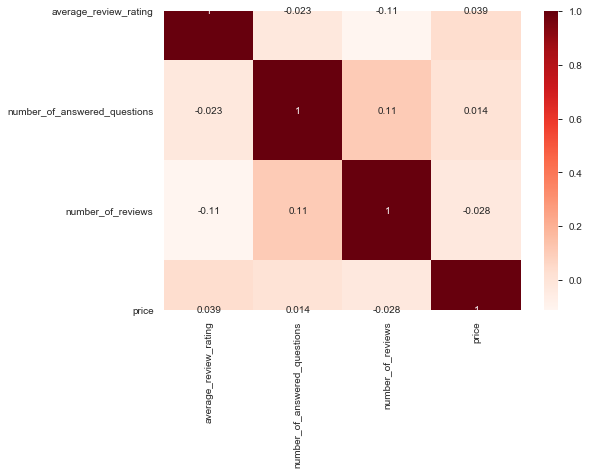

In [49]:
#heat map 1
corr=data3.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.Reds)

In [50]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14970 entries, 0 to 14999
Data columns (total 19 columns):
amazon_category_and_sub_category               13672 non-null object
average_review_rating                          14970 non-null float64
customer_questions_and_answers                 1391 non-null object
customer_reviews                               14965 non-null object
customers_who_bought_this_item_also_bought     13363 non-null object
description                                    13991 non-null object
items_customers_buy_after_viewing_this_item    10264 non-null object
manufacturer                                   14970 non-null object
number_available_in_stock                      11115 non-null object
number_of_answered_questions                   13826 non-null float64
number_of_reviews                              9982 non-null float64
price                                          12807 non-null float64
product_description                            13991 non-null

In [51]:
topmanufact=pd.DataFrame(data3['manufacturer'].value_counts().head(10))

In [52]:
topmanufact

,manufacturer
LEGO,273
Disney,240
Oxford Diecast,226
Playmobil,217
The Puppet Company,179
Mattel,169
Star Wars,158
Scalextric,151
Hornby,143
Hasbro,142


In [53]:
data4 = data3.dropna()


In [54]:
data4.max()
data4.min()


amazon_category_and_sub_category                                        Arts & Crafts > Art Sand
average_review_rating                                                                        3.5
customer_questions_and_answers                 Anyone been able to get the dongle to work? Wo...
customer_reviews                               *** // 4.0 // 21 Dec. 2015 // By\n    \n    Ma...
customers_who_bought_this_item_also_bought     http://www.amazon.co.uk/100M-Twisted-String-Wh...
description                                    "Fantastic Value for Money"3 Great colours to ...
items_customers_buy_after_viewing_this_item    http://www.amazon.co.uk/12-Inch-Replica-Stunt-...
manufacturer                                                           4 Pocket Pro Binder Black
number_available_in_stock                                                                      1
number_of_answered_questions                                                                   1
number_of_reviews             

In [55]:
data4=data3[data3['manufacturer'].isin(['LEGO','Disney','Oxford Diecast','Playmobil','The Puppet Company','Mattel','Star Wars','Scalextric','Hornby','Hasbro'])]

TypeError: nan is not a string

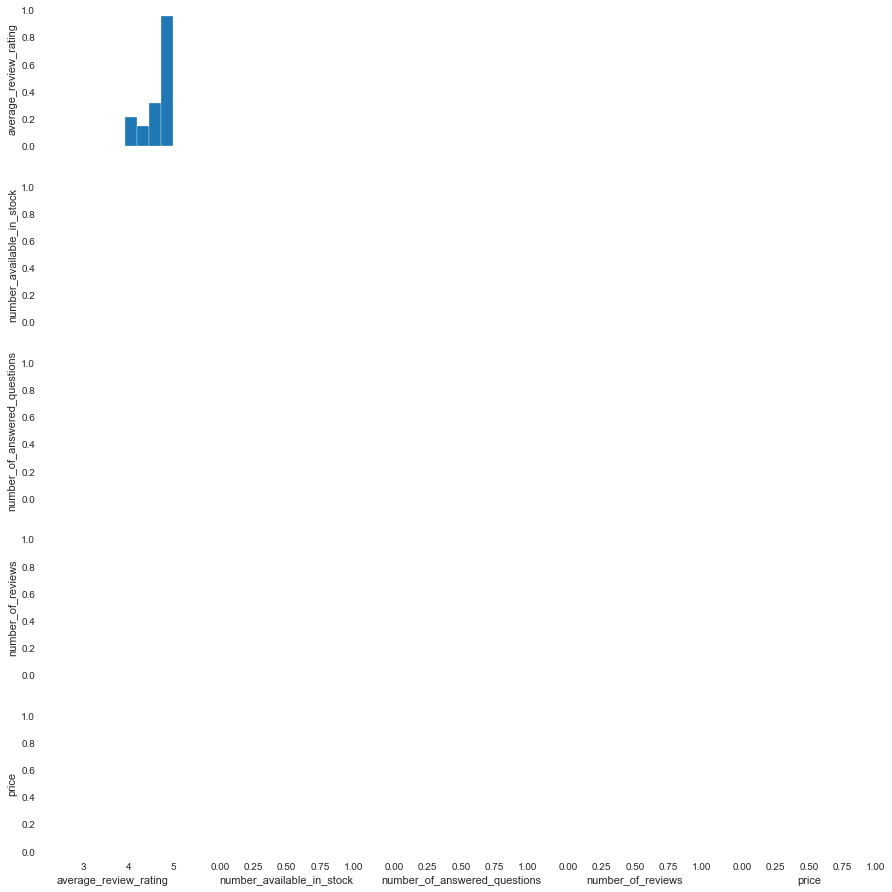

In [56]:
#PLOTTING

#pairplot
sns.pairplot(data4,kind='reg')

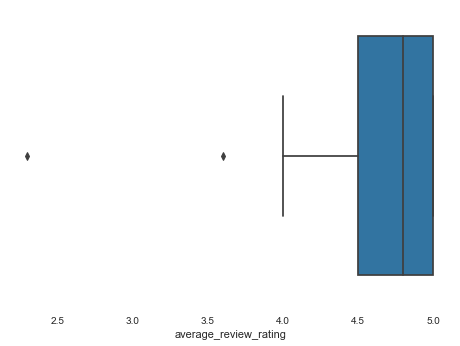

In [57]:
#boxplots univariate
#average_review_rating
sns.boxplot(x='average_review_rating', data=data4)


TypeError: unsupported operand type(s) for /: 'str' and 'int'

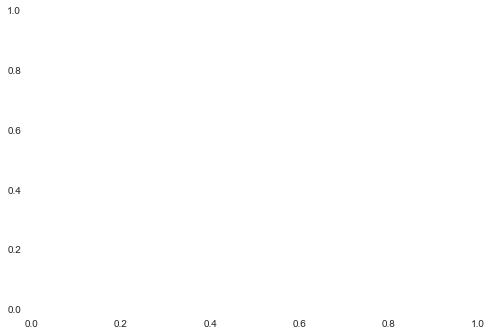

In [58]:

#number_available_in_stock
sns.boxplot(x='number_available_in_stock', data=data4)


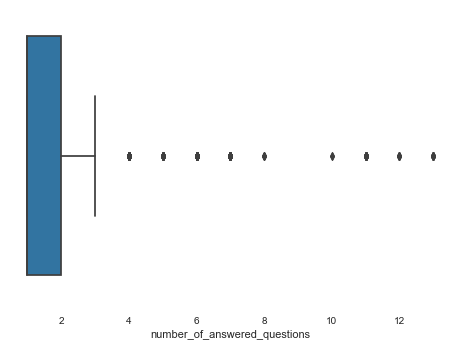

In [59]:


#number_of_answered_questions
sns.boxplot(x='number_of_answered_questions', data=data4)



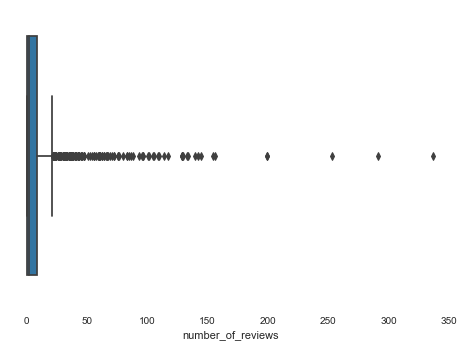

In [60]:

#number_of_reviews
sns.boxplot(x='number_of_reviews', data=data4)



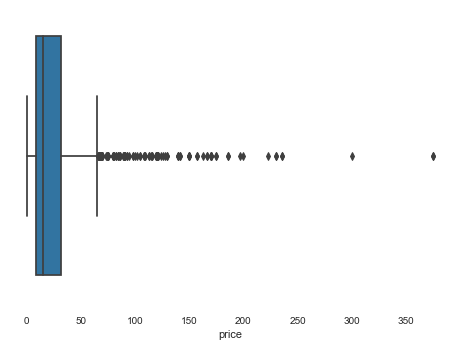

In [61]:

#price
sns.boxplot(x='price', data=data4)


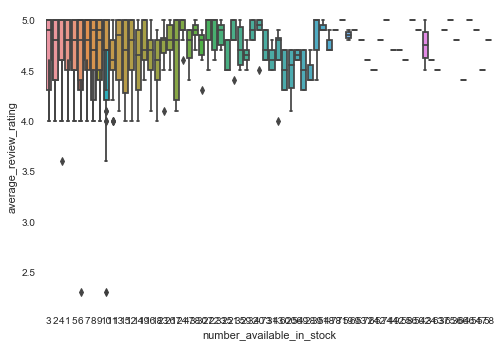

In [62]:

sns.boxplot(x='manufacturer', y ='average_review_rating', data=data4, order=data4['manufacturer'].value_counts().index)
sns.boxplot(x='number_available_in_stock', y ='average_review_rating', data=data4, order=data4['number_available_in_stock'].value_counts().index)


Text(0.5, 1.0, 'average_review_rating per manufacturer')

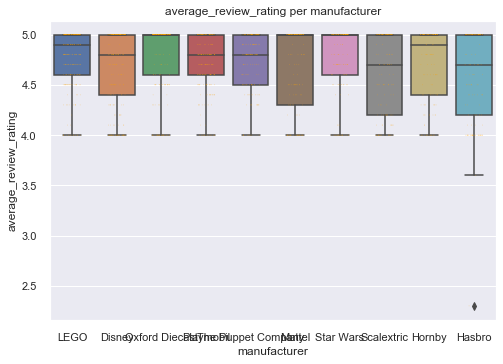

In [63]:


sns.set(style='darkgrid')
BoW=sns.boxplot(x='manufacturer', y ='average_review_rating', data=data4, order=data4['manufacturer'].value_counts().index)
SoW=sns.stripplot(x='manufacturer', y='average_review_rating', data=data4, color="orange", jitter=0.2, size=0.5,  order=data4['manufacturer'].value_counts().index)
plt.title("average_review_rating per manufacturer")

In [64]:
data4.head()

,amazon_category_and_sub_category,average_review_rating,customer_questions_and_answers,customer_reviews,customers_who_bought_this_item_also_bought,description,items_customers_buy_after_viewing_this_item,manufacturer,number_available_in_stock,number_of_answered_questions,number_of_reviews,price,product_description,product_information,product_name,sellers,source,uniq_id,amazon_category
0,Hobbies > Model Trains & Railway Sets > Rail V...,4.9,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Hornby,5,1.0,NaN,3.42,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Hornby 2014 Catalogue,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",train,eac7efa5dbd3d667f26eb3d3ab504464,Hobbies
3,Hobbies > Model Trains & Railway Sets > Rail V...,4.3,Can this train go backwards as well as forward...,Beautiful set // 5.0 // 3 Dec. 2015 // By\n ...,http://www.amazon.co.uk/Hornby-R8221-Gauge-Tra...,Product Description Inject a bit of Hornby mag...,http://www.amazon.co.uk/Hornby-R1151-Caledonia...,Hornby,3,7.0,NaN,69.93,Product Description Inject a bit of Hornby mag...,Technical Details Item Weight1.2 Kg Product Di...,Hornby Santa's Express Train Set,"{""seller""=>[{""Seller_name_1""=>""Toy Arena"", ""Se...",train,87bbb472ef9d90dcef140a551665c929,Hobbies
4,Hobbies > Model Trains & Railway Sets > Rail V...,5.0,The description is incorrect. the hornby site...,Five Stars // 5.0 // 23 Dec. 2015 // By\n \...,http://www.amazon.co.uk/Hornby-Western-Master-...,Western Express Digital Train Set with eLink a...,http://www.amazon.co.uk/Hornby-Western-Master-...,Hornby,4,1.0,NaN,235.58,Western Express Digital Train Set with eLink a...,Technical Details Item Weight2.3 Kg Product Di...,Hornby Gauge Western Express Digital Train Set...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",train,7e2aa2b4596a39ba852449718413d7cc,Hobbies
6,Hobbies > Model Trains & Railway Sets > Rail V...,5.0,NaN,steaming good engine! // 5.0 // 11 Jan. 2016 /...,http://www.amazon.co.uk/Hornby-R8223-Gauge-Tra...,Product Description RailRoad 0-4-0 'Hogarth St...,http://www.amazon.co.uk/Hornby-R3064-RailRoad-...,Hornby,6,1.0,NaN,27.49,Product Description RailRoad 0-4-0 'Hogarth St...,Technical Details Item Weight82 g Product Dime...,Hornby Gauge Railroad Mosley Tarmacadam Locomo...,NaN,train,5c76389a8c302c6d7d6e179393031b97,Hobbies
9,Hobbies > Model Trains & Railway Sets > Rail V...,5.0,NaN,Gods Wonderful Railway. // 5.0 // 29 Oct. 2014...,http://www.amazon.co.uk/Hornby-R8211-Steam-Rol...,Product Description Hornby Weathered DCC Ready...,NaN,Hornby,2,1.0,NaN,119.50,Product Description Hornby Weathered DCC Ready...,Technical Details Item Weight499 g Product Dim...,Hornby 00 Gauge 253mm Weathered Paviland Grang...,NaN,train,03a35de3f7af9814978e6de645cb8ffa,Hobbies


In [65]:
data4.shape

(1898, 19)

In [66]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1898 entries, 0 to 14996
Data columns (total 19 columns):
amazon_category_and_sub_category               1633 non-null object
average_review_rating                          1898 non-null float64
customer_questions_and_answers                 204 non-null object
customer_reviews                               1898 non-null object
customers_who_bought_this_item_also_bought     1748 non-null object
description                                    1831 non-null object
items_customers_buy_after_viewing_this_item    1426 non-null object
manufacturer                                   1898 non-null object
number_available_in_stock                      1705 non-null object
number_of_answered_questions                   1785 non-null float64
number_of_reviews                              1254 non-null float64
price                                          1534 non-null float64
product_description                            1831 non-null object
produ

In [67]:

data4.number_of_reviews.fillna(data4.number_of_reviews.mean(), inplace=True)
data4.number_available_in_stock.fillna(data4.number_available_in_stock.mean(), inplace=True)
data4.number_of_answered_questions.fillna(data4.number_of_answered_questions.mean(), inplace=True)
data4.price.fillna(data4.price.mean(), inplace=True)


data4.amazon_category[data4.amazon_category.isna()==True]='Characters'
data4['amazon_category'].isna().sum()


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


TypeError: can only concatenate str (not "int") to str

In [68]:
#PREPARE FOR RUNNING THE MODEL - SEPARATE X AND Y AND ENCODE DUMMIES
y=data4.average_review_rating
x=data4.drop(['product_name','amazon_category_and_sub_category','customer_reviews','average_review_rating','customer_questions_and_answers','items_customers_buy_after_viewing_this_item','sellers','customers_who_bought_this_item_also_bought','product_description','description','product_information','source','uniq_id'],axis=1)
x.info()

x.isnull().sum()
x.shape
y.shape




<class 'pandas.core.frame.DataFrame'>
Int64Index: 1898 entries, 0 to 14996
Data columns (total 6 columns):
manufacturer                    1898 non-null object
number_available_in_stock       1705 non-null object
number_of_answered_questions    1785 non-null float64
number_of_reviews               1898 non-null float64
price                           1534 non-null float64
amazon_category                 1633 non-null object
dtypes: float64(3), object(3)
memory usage: 183.8+ KB


(1898,)

In [69]:
xencoded= pd.get_dummies(data4, columns=['manufacturer', 'amazon_category'],
                    drop_first=True, prefix=['manufacturer','amazon_category'])

In [70]:
#create model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR



In [71]:

#Scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

x_scaled=pd.DataFrame(mm.fit_transform(xencoded), columns =xencoded.columns)




ValueError: could not convert string to float: 'Hobbies > Model Trains & Railway Sets > Rail Vehicles > Trains'

In [117]:
# Create train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xencoded,y,test_size=0.3,random_state=0)



NameError: name 'xencoded' is not defined

In [72]:
# Backward Feature Elimination
def remove_maxpvalcol(drop_col, X_train, X_test):    
    X_train.drop([drop_col], axis = 1, inplace = True)
    X_test.drop([drop_col], axis = 1, inplace = True)
    
def model_fit(X_train, y_train):
    import statsmodels.api as sm
    X1 = sm.add_constant(X_train)
    return sm.OLS(y_train, X1).fit()

while True: 
    lr = model_fit(X_train, y_train)
    lr_pval_max = lr.pvalues.max()
    if lr_pval_max > 0.01:
        drop_col = lr.pvalues[lr.pvalues == lr_pval_max].index[0]
        print('Dropping column : {}'.format(drop_col)) 
        remove_maxpvalcol(drop_col, X_train, X_test);
    else:
        break;

print(lr.summary())



NameError: name 'X_train' is not defined

In [73]:


#Linear regression model using OLS
import statsmodels.api as sm
X1 = sm.add_constant(X_train)

ols = sm.OLS(y_train,X1)
lr = ols.fit()

print(lr.summary())



NameError: name 'X_train' is not defined

In [74]:
# Train the model

model = LinearRegression()
model.fit(X_train,y_train)



NameError: name 'X_train' is not defined

In [75]:
# Test the model

y_pred = model.predict(X_test)



NameError: name 'X_test' is not defined

In [76]:
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
print(r2_score(y_train,model.predict(X_train)))


NameError: name 'y_test' is not defined

In [77]:
model.intercept_
model.coef_
mean_squared_error(y_test,y_pred)
r2_score(y_test,y_pred)
r2_score(y_train,model.predict(X_train))


AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [78]:
#DECISION TREE


adaboostmodel = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3),learning_rate = 4, n_estimators = 450)
adaboostmodel.fit(xencoded, y)
adaboostmodel.score(x_test, y_test)


ValueError: Input contains NaN

TypeError: nan is not a string

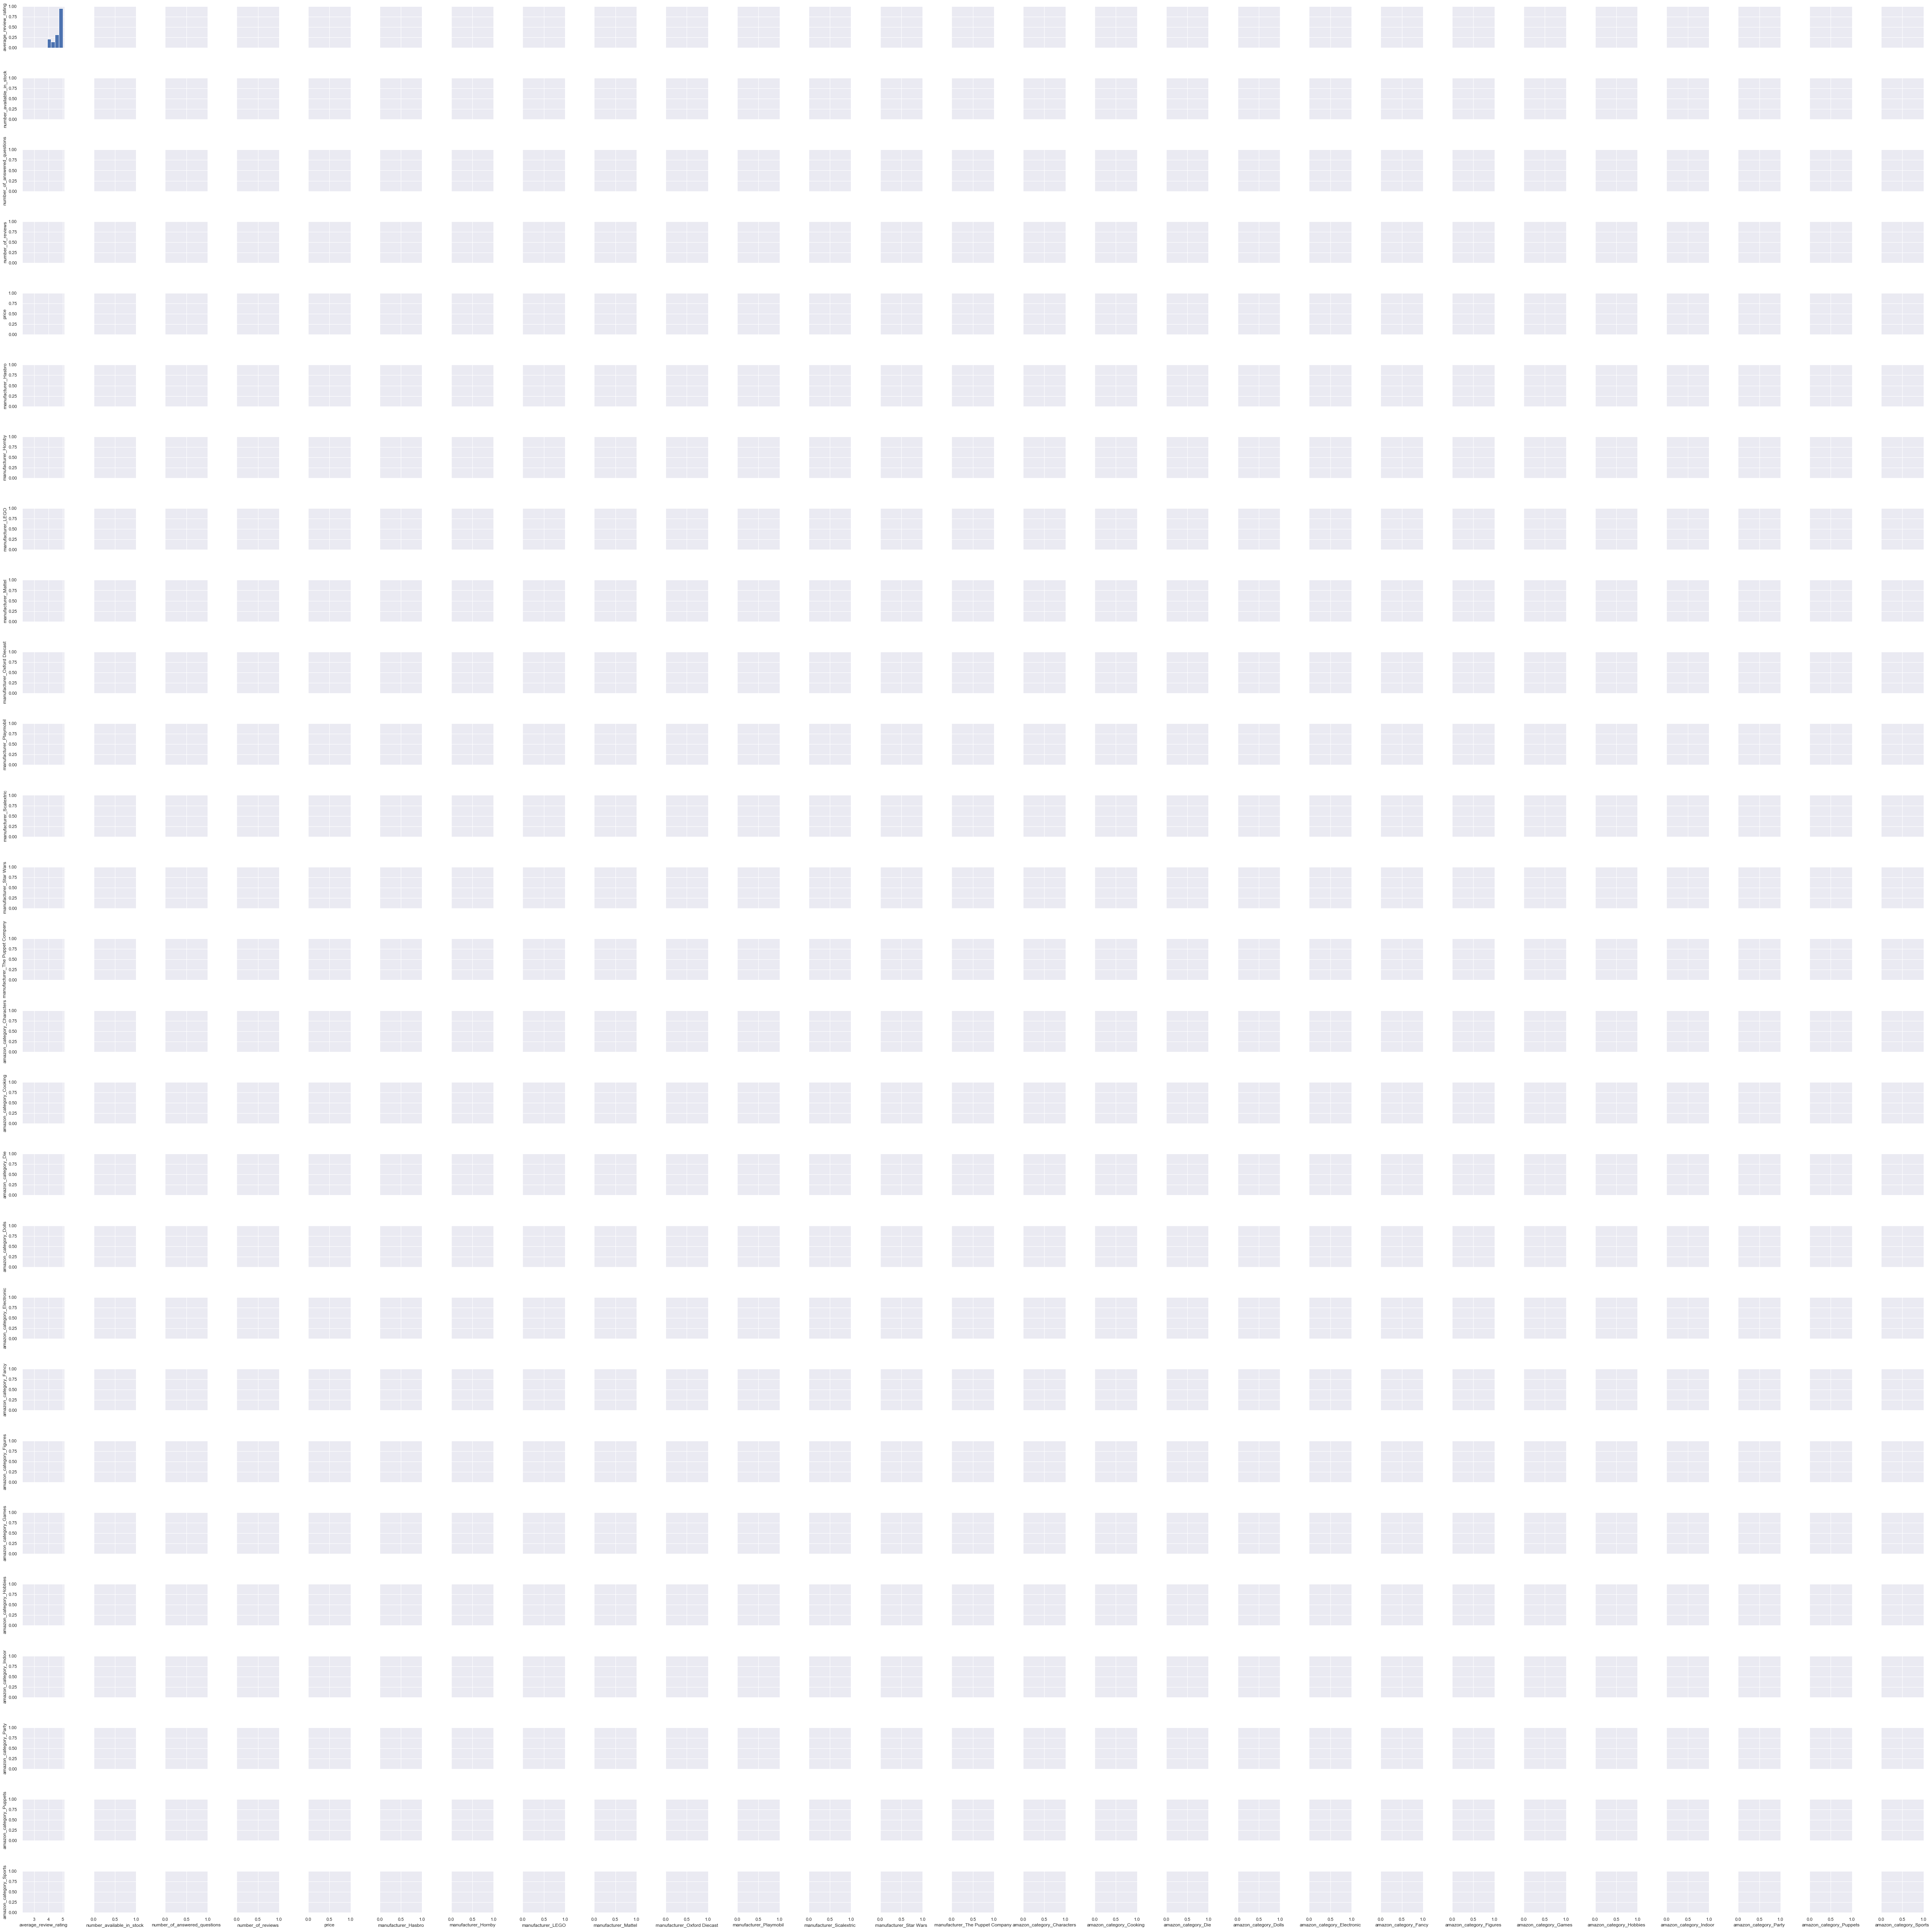

In [79]:
#PLOT ENCODED VALUES
sns.pairplot(xencoded)


In [ ]:
model4=RandomForestRegressor()
grid_params_RF={
           'n_estimators':range(50,90,10),
           'max_depth':[15,16,17,18,19,20,21]
           }
clf4=GridSearchCV(model4,grid_params_RF,cv=4,scoring='r2')
clf4.fit(x_scaled, y)
clf4.best_params_ 
clf4.best_score_


In [ ]:
# Best Params 'max_depth':19 , 'n_estimators': 60
randformodel = RandomForestRegressor( max_depth= 19, n_estimators = 60)
randformodel.fit(x_scaled,y)
randformodel.score(X_test,y_test)

